<a href="https://colab.research.google.com/github/a-foote/DATA586G8_FraudDetector/blob/alyssa/Fraud_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif


RANDOM_SEED = 123

In [2]:
#read data and review spread of data
df = pd.read_csv('creditcard.csv')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.shape

(284807, 31)

In [ ]:
#confirm no null values exist
df.isnull().sum().max()

0

In [ ]:
#check for duplicates
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [ ]:
#count duplicate frauds
df[df['Class'] == 1].duplicated().value_counts()

False    473
True      19
dtype: int64

In [ ]:
#count duplicate non-frauds
df[df['Class'] == 0].duplicated().value_counts()

False    283253
True       1062
dtype: int64

In [3]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#list column names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0.5, 1.0, 'Class Distributions')

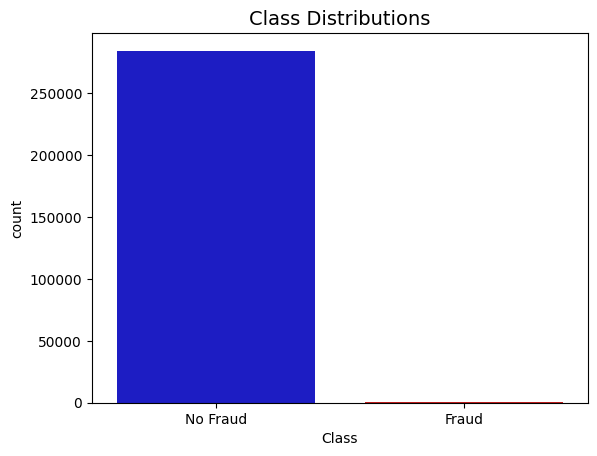

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.xticks(np.arange(2), ('No Fraud', 'Fraud'))
plt.title('Class Distributions', fontsize=14)

In [4]:
#scale amount and time

df['amount_scaled'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

#move scaled columns to columns 0,1
amount_scaled = df['amount_scaled']
scaled_time = df['time_scaled']
df.drop(['amount_scaled', 'time_scaled'], axis=1, inplace=True)
df.insert(0, 'amount_scaled', amount_scaled)
df.insert(1, 'time_scaled', scaled_time)

In [ ]:
#feature selection with FPR
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

bestFeatures = GenericUnivariateSelect(score_func=mutual_info_classif, mode='fpr',param=0.05)
fit = bestFeatures.fit(X,y,)
dfresults = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureResults = pd.concat([dfcolumns,dfresults],axis=1)
featureResults.columns = ['Feature','Score']
print(featureResults.sort_values(by=['Score'],ascending=False))


          Feature     Score
18            V17  0.007873
15            V14  0.007746
13            V12  0.007220
11            V10  0.007150
12            V11  0.006450
17            V16  0.005752
5              V4  0.004587
4              V3  0.004583
19            V18  0.003875
10             V9  0.003854
8              V7  0.003631
3              V2  0.002920
28            V27  0.002166
22            V21  0.002139
6              V5  0.002065
7              V6  0.002000
2              V1  0.001851
29            V28  0.001607
9              V8  0.001600
0   amount_scaled  0.001507
1     time_scaled  0.001337
20            V19  0.001132
21            V20  0.000904
24            V23  0.000471
25            V24  0.000364
26            V25  0.000251
27            V26  0.000239
23            V22  0.000126
14            V13  0.000085
16            V15  0.000023


In [ ]:
#reset X based on FPR selection results, drop scores < 0.001
X = X.drop(['V20','V23','V24','V25','V26','V22','V13','V15'],axis=1)

In [ ]:
#feature selection with FDR
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

bestFeatures = GenericUnivariateSelect(score_func=mutual_info_classif, mode='fdr',param=0.05)
fit = bestFeatures.fit(X,y,)
dfresults = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureResults = pd.concat([dfcolumns,dfresults],axis=1)
featureResults.columns = ['Feature','Score']
print(featureResults.sort_values(by=['Score'],ascending=False))
#same results as FPR so no further work done

          Feature     Score
18            V17  0.007873
15            V14  0.007746
13            V12  0.007220
11            V10  0.007150
12            V11  0.006450
17            V16  0.005752
5              V4  0.004587
4              V3  0.004583
19            V18  0.003875
10             V9  0.003854
8              V7  0.003630
3              V2  0.002920
28            V27  0.002166
22            V21  0.002139
6              V5  0.002065
7              V6  0.002000
2              V1  0.001851
29            V28  0.001607
9              V8  0.001600
1     time_scaled  0.001389
0   amount_scaled  0.001385
20            V19  0.001132
21            V20  0.000904
24            V23  0.000471
25            V24  0.000364
26            V25  0.000253
27            V26  0.000239
23            V22  0.000126
14            V13  0.000085
16            V15  0.000023


In [ ]:
#feature selection with FWE
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

bestFeatures = GenericUnivariateSelect(score_func=mutual_info_classif, mode='fwe',param=0.05)
fit = bestFeatures.fit(X,y,)
dfresults = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureResults = pd.concat([dfcolumns,dfresults],axis=1)
featureResults.columns = ['Feature','Score']
print(featureResults.sort_values(by=['Score'],ascending=False))
#same results as FPR and FDR so no further work done

          Feature     Score
18            V17  0.007873
15            V14  0.007746
13            V12  0.007220
11            V10  0.007150
12            V11  0.006450
17            V16  0.005752
5              V4  0.004587
4              V3  0.004583
19            V18  0.003875
10             V9  0.003856
8              V7  0.003631
3              V2  0.002920
28            V27  0.002166
22            V21  0.002139
6              V5  0.002065
7              V6  0.002000
2              V1  0.001851
29            V28  0.001607
9              V8  0.001600
0   amount_scaled  0.001400
1     time_scaled  0.001364
20            V19  0.001132
21            V20  0.000904
24            V23  0.000471
25            V24  0.000364
26            V25  0.000253
27            V26  0.000239
23            V22  0.000126
14            V13  0.000085
16            V15  0.000023


In [5]:
#define X and y for full dataset 
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
y[y.isna()]

Series([], Name: Class, dtype: int64)

In [6]:
# Train and Test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=69)

In [ ]:
#merge trainval back together
trainval = pd.concat([X_trainval, y_trainval],axis=1)
trainval.head()

,amount_scaled,time_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
131209,2.039405,-0.060750,0.973182,-0.398310,-0.275475,-0.163117,-0.274127,-0.916093,0.517064,-0.281366,...,0.251531,-0.270088,-1.141467,0.052946,0.143815,0.001378,1.096442,-0.149123,0.018936,0
229791,0.081464,0.720873,0.385273,0.596798,-0.560534,-1.506014,1.016335,-1.420794,1.762729,-0.736705,...,0.027217,0.146134,0.722909,-0.195606,1.280429,0.083790,0.911662,-0.267488,-0.248234,0
53773,-0.269964,-0.452942,-1.044519,1.104374,0.587008,0.144883,0.399978,0.563941,-0.099757,0.658616,...,0.059259,-0.122502,-0.482541,-0.108243,-1.156561,-0.523187,0.244448,-0.003397,0.087018,0
265976,-0.176762,0.909738,-0.909553,0.273070,-0.401854,-2.200167,3.732417,3.236887,0.692304,0.420759,...,-0.017176,-0.394718,-0.779348,-0.282044,0.707524,-0.144915,0.070718,-0.215493,-0.303012,0
274535,-0.282401,0.956062,-1.584358,0.089006,-0.872386,-0.286382,0.967318,-1.206637,0.338463,0.274947,...,-0.518471,0.230511,1.412809,0.805656,-0.394218,-0.474548,-0.161696,0.626393,0.122114,0


In [ ]:
#undersampling to balance the training and validation set
num_frauds = len(trainval[trainval["Class"]==1])
frauds = trainval.loc[trainval['Class'].values == 1, :]
no_frauds = trainval.drop(index = frauds.index)
no_frauds = no_frauds.sample(n = num_frauds)
balanced_trainval = pd.concat([no_frauds, frauds])

Text(0.5, 1.0, 'Training & Validation Class Distributions')

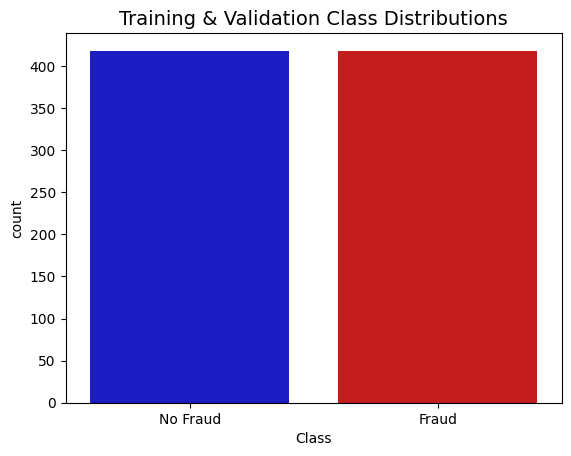

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=balanced_trainval, palette=colors)
plt.xticks(np.arange(2), ('No Fraud', 'Fraud'))
plt.title('Undersampling Training & Validation Class Distributions', fontsize=14)

In [ ]:
# Train and validation split
X_trainval = balanced_trainval.iloc[:, 0:-1]
y_trainval = balanced_trainval.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.05, stratify=y_trainval, random_state=21)

In [ ]:
#form train, validation, test sets
train_dataset = pd.concat([X_train, y_train],axis=1)
val_dataset = pd.concat([X_val, y_val],axis=1)
test_dataset = pd.concat([X_test, y_test],axis=1)

In [ ]:
#save train, validation, and test sets to csv
train_dataset.to_csv('fraud_trainset.csv')
val_dataset.to_csv('fraud_valset.csv')
test_dataset.to_csv('fraud_testset.csv')

In [7]:
#oversamping usine SMOTE to balanace training and validation
smote = SMOTE(random_state=586)
X_trainval_smote, y_trainval_smote = smote.fit_resample(X_trainval,y_trainval)

Text(0.5, 1.0, 'SMOTE Training & Validation Class Distributions')

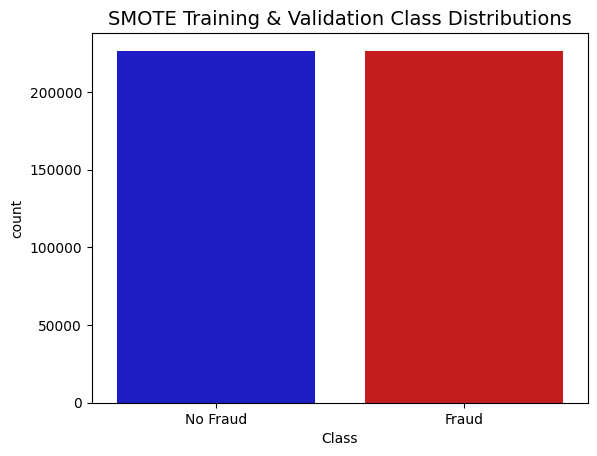

In [8]:
#visualize SMOTE Distribution
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=pd.concat([X_trainval_smote, y_trainval_smote],axis=1), 
              palette=colors)
plt.xticks(np.arange(2), ('No Fraud', 'Fraud'))
plt.title('SMOTE Training & Validation Class Distributions', fontsize=14)

In [ ]:
#split and form smote training and validation sets
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_trainval_smote, y_trainval_smote, test_size=0.05, stratify=y_trainval_smote, random_state=21)
train_dataset_smote = pd.concat([X_train_smote, y_train_smote],axis=1)
val_dataset_smote = pd.concat([X_val_smote, y_val_smote],axis=1)

In [ ]:
#save smote (30 features) train and validation sets to csv
train_dataset_smote.to_csv('fraud_trainset_smote_nodupe.csv',index=False)
val_dataset_smote.to_csv('fraud_valset_smote_nodupe.csv',index=False)

In [ ]:
#save smote (22 features FPR) train and validation sets to csv
train_dataset_smote.to_csv('fraud_trainset_smote_22FPR.csv')
val_dataset_smote.to_csv('fraud_valset_smote_22FPR.csv')

In [9]:
#form and save test set without duplicates
test_dataset_nodupe = pd.concat([X_test, y_test],axis=1)
test_dataset_nodupe.to_csv('fraud_testset_nodupe.csv',index=False)

In [10]:
#form and save train smote (30 features) to csv
train_dataset_smote = pd.concat([X_trainval_smote, y_trainval_smote],axis=1)
train_dataset_smote.to_csv('fraud_trainset_smote_nodupe.csv',index=False)